In [1]:
# importing the packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")


In [4]:
# reading the file
df = pd.read_csv('nyc_taxi_trip_duration.csv')
df.shape, df.columns

((729322, 11),
 Index([u'id', u'vendor_id', u'pickup_datetime', u'dropoff_datetime',
        u'passenger_count', u'pickup_longitude', u'pickup_latitude',
        u'dropoff_longitude', u'dropoff_latitude', u'store_and_fwd_flag',
        u'trip_duration'],
       dtype='object'))

In [5]:
# having a look at one row to get an idea of what the data looks 
# like
df.iloc[1,:]

id                              id0889885
vendor_id                               1
pickup_datetime       2016-03-11 23:35:37
dropoff_datetime      2016-03-11 23:53:57
passenger_count                         2
pickup_longitude                 -73.9883
pickup_latitude                   40.7317
dropoff_longitude                -73.9948
dropoff_latitude                  40.6949
store_and_fwd_flag                      N
trip_duration                        1100
Name: 1, dtype: object

In [6]:
#time to look at the data-types of column
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [11]:
#now its time to look at the columns which might influence
#the trip duration 

#lets first look at the vendor-id, as the driving capabilities may
#or may not influence the trip duration
df['vendor_id'].nunique()

2

In [28]:
from datetime import date
import calendar
my_date = date.today()

import datetime



In [44]:
# let us look at the pickup date-time
day = df['pickup_datetime'][0].split()[0]
year, month, day = (int(x) for x in day.split('-'))    
ans = datetime.date(year, month, day)
print ans.strftime("%A")

# we will get access to which day of the week was the cab booked
dfDay = df
arr = []
def generateDay(feature):
    for i in range(0,len(df[feature])):
        date = df[feature][i].split()[0]
        year, month, day = (int(x) for x in date.split('-'))
        ans = datetime.date(year, month, day)
        arr.append(ans.strftime("%A"))
generateDay('pickup_datetime')
arr
dfDay['weekday'] = arr

Monday


In [78]:
dfDay
dfDay['lengthDuration'] = df['trip_duration']
a = []
# categorizing the the duration of the trip
def genTime():
    for i in range(0, len(df['trip_duration'])):
        time = df['trip_duration'][i]
        if (time >= 1800):
            a.append(3)
        elif (time < 1800 and time >= 900):
            a.append(2)
        else: 
            a.append(1)

genTime()
dfDay['lengthDuration'] = a


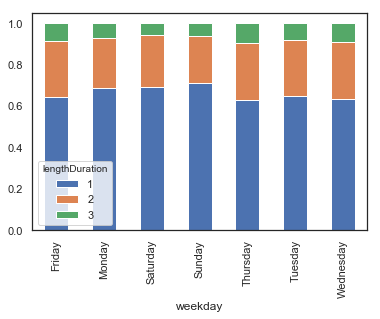

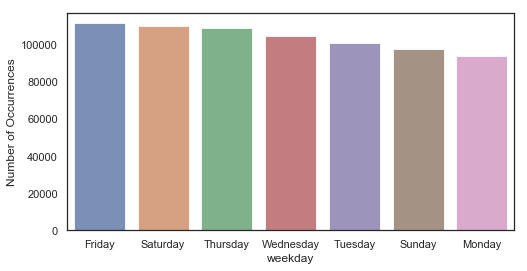

In [79]:
# now that we have categorized the trip based on the time duration and which week 
# the cab was booked, we can find a relation between the day and trip duration
def barplot_percentages(feature):
    #fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
    ax1 = dfDay.groupby(feature)['lengthDuration'].value_counts(normalize=True).unstack()
    ax1.plot(kind='bar', stacked='True')
    int_level = dfDay[feature].value_counts()

    plt.figure(figsize=(8,4))
    sns.barplot(int_level.index, int_level.values, alpha=0.8)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(str(feature), fontsize=12)
    plt.show()
barplot_percentages("weekday")

In [88]:
time = df['pickup_datetime'][0].split()[1]
time
hour, minute, sec = (int(x) for x in time.split(':'))
hour, minute, sec

ar = []
def generateDay(feature):
    for i in range(0,len(dfDay[feature])):
        time = dfDay[feature][i].split()[1]
        hour, minute, sec = (int(x) for x in time.split(':'))
        if (hour > 21):
            ar.append('Night: 9 - 6 am')
        elif(hour <= 21 and hour > 19):
            ar.append('Evening Office Hours: 7 - 9 pm')
        elif(hour <= 19 and hour > 16):
            ar.append('Evening  Hours: 4 - 7 pm')
        elif(hour <= 16 and hour > 12):
            ar.append('Afternoon: 12 - 4 pm')
        elif(hour <= 12 and hour > 9):
            ar.append('Morning Office Hours: 9 - 12 pm')
        else:
            ar.append('Morning: 6 - 9 pm')
generateDay('pickup_datetime')
dfDay['Time_Of_Day'] = ar

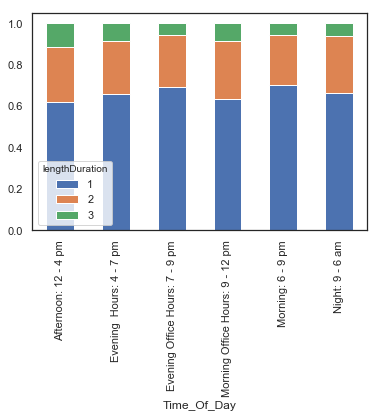

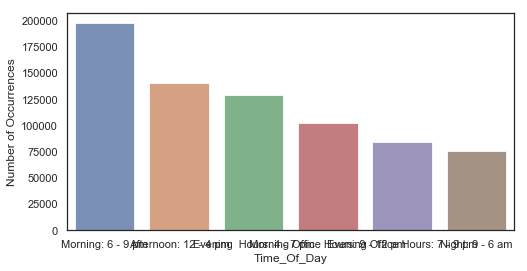

In [89]:
barplot_percentages("Time_Of_Day")

In [90]:
#Now that we have answered the question about the pickup date-time and its relationship with the 
#trip duration, It is time to look at the the pickup location for nyc cabs

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,weekday,lengthDuration,Time_Of_Day
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,1,Afternoon: 12 - 4 pm
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,2,Night: 9 - 6 am
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,2,Evening Hours: 4 - 7 pm
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,2,Morning: 6 - 9 pm
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,1,Morning: 6 - 9 pm
5,id1918069,2,2016-02-14 18:31:42,2016-02-14 18:55:57,2,-73.993614,40.751884,-73.995422,40.723862,N,1455,Sunday,2,Evening Hours: 4 - 7 pm
6,id2429028,1,2016-04-20 20:30:14,2016-04-20 20:36:51,1,-73.965080,40.758915,-73.976807,40.764107,N,397,Wednesday,1,Evening Office Hours: 7 - 9 pm
7,id1663798,2,2016-06-19 16:48:14,2016-06-19 17:06:35,1,-73.963890,40.765434,-73.872429,40.774200,N,1101,Sunday,2,Afternoon: 12 - 4 pm
8,id2436943,2,2016-03-28 19:17:03,2016-03-28 19:48:29,2,-73.872887,40.774281,-73.979019,40.761879,N,1886,Monday,3,Evening Hours: 4 - 7 pm
9,id2933909,1,2016-04-10 22:01:41,2016-04-10 22:25:30,1,-73.987823,40.740982,-73.999153,40.686451,N,1429,Sunday,2,Night: 9 - 6 am


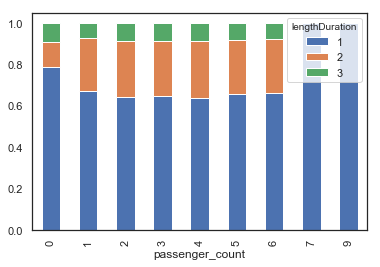

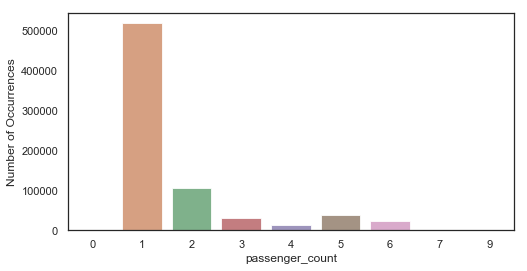

In [91]:
barplot_percentages("passenger_count")

In [95]:
df3 = dfDay

In [141]:
pickup = []
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0
#Calculating the distance between the pickup and drop off location

for i in range(0, len(df)):
    lat1 = radians(df3['pickup_latitude'][i])
    lon1 = radians(df3['pickup_longitude'][i])
    lat2 = radians(df3['dropoff_latitude'][i])
    lon2 = radians(df3['dropoff_longitude'][i])
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = (sin(dlat / 2)**2) + cos(lat1) * cos(lat2) * (sin(dlon / 2)**2)
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    pickup.append(distance)

dfDay["Distance"] = pickup


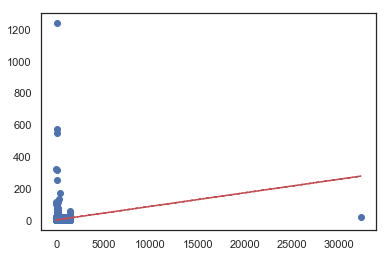

In [162]:
plt.plot(dfDay['trip_duration'] / 60, dfDay['Distance'], "o")
# Add correlation line
z = np.polyfit(dfDay['trip_duration'] / 60, dfDay['Distance'], 1)
p = np.poly1d(z)
plt.plot(dfDay['trip_duration'] / 60,p(dfDay['trip_duration'] / 60),"r--")



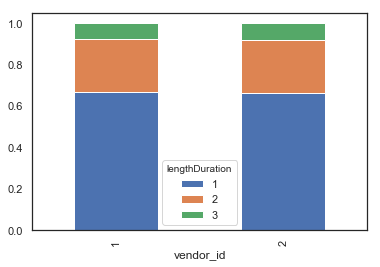

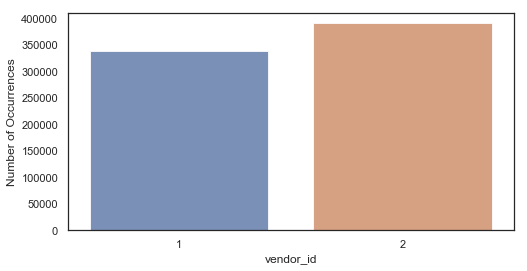

In [164]:
barplot_percentages("vendor_id")

In [165]:
'''
My observations
1. Based on which day of the week it is
    a. The chances of it being a short trip (less than 15 minutes) is higher on Saturday,
       Sunday and Monday. It decreases as the week progresses
    b. The chances of it being a really long trip is highest in the middle of the week (tuesday,
       Wednesday and Thursday). It decreases (the number of long duration trips) as we approach
       the weekend
    c. The medium trips (15-30) are most common during the middle of the week

2. Based on what time of the day it is
    a. Genreally Speaking, the chances of a trip being very long is during the afternoon period
    b. Morning time has the highest amount of shortest cab trips
    c. As expected, the evening hours have the most amount of medium trips (time related)
    d. I personally feel that the day is a bit partial, as most of the cab rides have been 
       booked during the morning and in addition, the dividion of the time such as Morning,
       evening was based on my definition. Morning can further be subdivided into early morning
       and late night for an even more in depth analysis

3. Based on the vendor_id
    a. There are two vendor ids and both the bars in the graph are nearly identitical, hence
       they dont have an affect on the trip duration

4. Based on the number of Passengers
    a. Similar to vendor id, the number of passengers dont seem to have an affect since the bars
       are nearly identical for all

5. Based on the pickup and drop of location
    a. the things taken into consideration are pickup lat/long and drop off lat/long in order
       to calculate the distance travelled. The graph between the distance and duration shows 
       a positive correlation between the two (some anomoly is there, which is not surprising
       as traffic also comes into play which has not been considered over here).

I tried to even explore the possibility of the pickup lat/long on its on by rounding off the degress
to two decimal places and grouping them up. I managed to reach 813 unique pickup destinations
but the graph was impossible to read unfortunately

'''

SyntaxError: invalid syntax (<ipython-input-165-4da0782c8a38>, line 1)